# Проект на тему: 
# Исследование стоимости квартир с евроремонтом. 
# Прогноз стоимости квартир после евроремонта.

## Задачи проекта:

1. Разработка модели машинного обучения для прогноза цены квартиры с учетом того, что в ней выполнят евроремонт.

2. Учет стоимости квартир с евроремонтом при предсказании 

3. Валидация модели и оценка точности на тестовой выборке

4. Интерпретация и визуализация результатов

5. Подготовка итогового отчета в Jupyter Notebook

6. Добавить данные по стоимости квартиры с евроремонтом в flats.csv в отдельный столбец


## Этапы выполнения проекта:

#### 1 Первичный осмотр датафреймов

#### 2 Подготовка данных

#### 3 Выбор наилучшей модели

#### 4 Тестирование наилучшей модели

#### 5 Вывод о проделанной работе

### Приступим к выполнению:

#### Импортируем необходимые библиотеки

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

### 1 Первичный осмотр датафреймов

In [2]:
flats = pd.read_csv('flats.csv')
display(flats.head())

,1. **id:** Идентификатор объекта.,2. **offer_views:** Количество просмотров объявления.,"3. **city:** Город, в котором расположен объект.",4. **lat:** Широта местоположения объекта.,5. **lon:** Долгота местоположения объекта.,6. **price_sq:** Цена за квадратный метр.,7. **area:** Площадь объекта.,8. **floor:** Этаж объекта.,9. **kitchen_area:** Площадь кухни.,10. **bathroom_type:** Тип ванны.,...,41. **all_data.house.yard[0-1].display_name:** Опции двора дома.,41. **all_data.house.yard[0-1].display_name:** Опции двора дома..1,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома.,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома..1,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома..2,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома..3,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома..4,43. **all_data.legal_options.years_ownership.display_name:** Срок владения объектом.,44. **all_data.legal_options.owner_count:** Количество владельцев объекта.,45. **all_data.object_info.garage_type.display_name:** Тип гаража объекта.
0,id,offer_views,city,lat,lon,price_sq,area,floor,kitchen_area,bathroom_type,...,all_data.house.yard[0].display_name,all_data.house.yard[1].display_name,all_data.house.infrastructure[0].display_name,all_data.house.infrastructure[1].display_name,all_data.house.infrastructure[2].display_name,all_data.house.infrastructure[3].display_name,all_data.house.infrastructure[4].display_name,all_data.legal_options.years_ownership.display...,all_data.legal_options.owner_count,all_data.object_info.garage_type.display_name
1,1914739808,0,Казань,"55,752364","49,171021",176510,49,18,"12,5",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1915485255,0,Москва,"55,734623","37,613548",179404,"38,6",5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914105595,0,Новосибирск,"55,059296","82,974436",91863,"38,1",1,"12,1",Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Детский сад,Торговый центр,Парк,Фитнес,NaN,NaN,NaN
4,1914234894,0,Новосибирск,"55,06373","82,934848",112903,31,4,6,Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Парк,Детский сад,Фитнес,Торговый центр,Больше пяти,1,NaN


In [3]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6692 entries, 0 to 6691
Data columns (total 61 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   1. **id:** Идентификатор объекта.                                                                      6692 non-null   object
 1   2. **offer_views:** Количество просмотров объявления.                                                  6692 non-null   object
 2   3. **city:** Город, в котором расположен объект.                                                       6692 non-null   object
 3   4. **lat:** Широта местоположения объекта.                                                             6692 non-null   object
 4   5. **lon:** Долгота местоположения объекта.                                                           

In [4]:
euro_flats = pd.read_csv('euro_renovation.csv')
display(euro_flats.head())

,1. **id:** Идентификатор объекта.,2. **offer_views:** Количество просмотров объявления.,"3. **city:** Город, в котором расположен объект.",4. **lat:** Широта местоположения объекта.,5. **lon:** Долгота местоположения объекта.,6. **price_sq:** Цена за квадратный метр.,7. **area:** Площадь объекта.,8. **floor:** Этаж объекта.,9. **kitchen_area:** Площадь кухни.,10. **bathroom_type:** Тип ванны.,...,41. **all_data.house.yard[0-1].display_name:** Опции двора дома.,41. **all_data.house.yard[0-1].display_name:** Опции двора дома..1,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома.,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома..1,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома..2,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома..3,42. **all_data.house.infrastructure[0-4].display_name:** Инфраструктура дома..4,43. **all_data.legal_options.years_ownership.display_name:** Срок владения объектом.,44. **all_data.legal_options.owner_count:** Количество владельцев объекта.,45. **all_data.object_info.garage_type.display_name:** Тип гаража объекта.
0,id,offer_views,city,lat,lon,price_sq,area,floor,kitchen_area,bathroom_type,...,all_data.house.yard[0].display_name,all_data.house.yard[1].display_name,all_data.house.infrastructure[0].display_name,all_data.house.infrastructure[1].display_name,all_data.house.infrastructure[2].display_name,all_data.house.infrastructure[3].display_name,all_data.house.infrastructure[4].display_name,all_data.legal_options.years_ownership.display...,all_data.legal_options.owner_count,all_data.object_info.garage_type.display_name
1,1900703057,0,Москва,"55,81212","37,632269",456666,15,1,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1871863655,0,Казань,"55,728718","49,171865",199975,"41,5",16,"8,6",Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Парк,Детский сад,Фитнес,Торговый центр,NaN,NaN,NaN
3,1912069065,0,Новосибирск,"54,955856","82,838521",80263,38,1,9,NaN,...,Детская площадка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1915932774,0,Новосибирск,"54,9309","82,91318",101754,"28,5",7,0,Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Детский сад,Торговый центр,Парк,NaN,Больше пяти,1,NaN


In [5]:
euro_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 61 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   1. **id:** Идентификатор объекта.                                                                      1321 non-null   object
 1   2. **offer_views:** Количество просмотров объявления.                                                  1321 non-null   object
 2   3. **city:** Город, в котором расположен объект.                                                       1321 non-null   object
 3   4. **lat:** Широта местоположения объекта.                                                             1321 non-null   object
 4   5. **lon:** Долгота местоположения объекта.                                                           

##### Вывод: исходя из предоставленных нам данных, можно понять, что придётся провести тщательный этап предобработки. В данном случае необходимо установить конкретные типы данных для определённых столбцов, а также переименовать часть столбцов. К примеру столбцы категории "Вид из окна" переименовать в отдельный вид из окна и 1 отметить к какому виду относится квартира, 0 - к какому НЕ относится.

### 2 Подготовка данных

Методом unique пробежимся по столбцам и посмотрим какие значения содержат категориальные столбцы.

In [6]:
for i in flats:
    print(i, flats[i].unique())

1. **id:** Идентификатор объекта. ['id' '1914739808' '1915485255' ... '1915046803' '1910492673' '1847766457']
2. **offer_views:** Количество просмотров объявления. ['offer_views' '0' '170' ... '1192' '1345' '303']
3. **city:** Город, в котором расположен объект. ['city' 'Казань' 'Москва' 'Новосибирск' 'поселение Мосрентген'
 'поселение Сосенское' 'поселение Московский' 'Санкт-Петербург']
4. **lat:** Широта местоположения объекта. ['lat' '55,752364' '55,734623' ... '59,858367' '59,860274' '59,830522']
5. **lon:** Долгота местоположения объекта. ['lon' '49,171021' '37,613548' ... '30,196257' '30,23078' '30,535973']
6. **price_sq:** Цена за квадратный метр. ['price_sq' '176510' '179404' ... '256157' '176875' '187725']
7. **area:** Площадь объекта. ['area' '49' '38,6' ... '22,78' '31,49' '18,74']
8. **floor:** Этаж объекта. ['floor' '18' '5' '1' '4' '2' '8' '3' '10' '14' '13' '6' '12' '7' '9' '11'
 '16' '15' '17' '21' '24' '20' '22' '19' '23' '25' '28' '31' '26' '32' nan]
9. **kitchen_area

In [7]:
for i in euro_flats:
    print(i, euro_flats[i].unique())

1. **id:** Идентификатор объекта. ['id' '1900703057' '1871863655' ... '1838378337' '1840264239' '1912385822']
2. **offer_views:** Количество просмотров объявления. ['offer_views' '0' '1739' '184' '2373' '484' '117' '104' '38' '252' '64'
 '656' '13' '1279' '485' '3164' '206' '536' '75' '807' '81' '6058' '1562'
 '1666' '137' '1158' '659' '12702' '507' '221' '500' '869' '92' '10'
 '8935' '166' '187' '6977' '317' '298' '371' '7' '70' '12' '410' '324'
 '152' '511' '408' '188' '373' '32' '35' '3776' '551' '384' '31' '33' '21'
 '114' '797' '650' '3' '145' '80' '405' '2181' '479' '54' '121' '270'
 '161' '136' '213' '59' '96' '492' '119' '846' '578' '23' '42' '6021'
 '5553' '84' '1169' '684' '167' '2762' '262' '217' '4465' '146' '1473'
 '629' '2' '441' '325' '60' '3929' '454' '6067' '4520' '3195' '33041'
 '1063' '2341' '1777' '28126' '77' '6768' '69' '13847' '176' '2681' '2631'
 '41' '3057' '874' '589' '891' '1147' '1280' '1129' '274' '3212' '1932'
 '431' '34' '338' '125' '269' '602' '1854' '29

Используем первую строку, чтобы переименовать столбцы, а затем отбросим её.

In [8]:
for i in flats:
    flats = flats.rename(columns={i: flats[i][0]})
flats = flats.drop(labels = [0],axis = 0)

for j in euro_flats:
    euro_flats = euro_flats.rename(columns={j: euro_flats[j][0]})
euro_flats = euro_flats.drop(labels = [0],axis = 0)

In [9]:
display(flats)

,id,offer_views,city,lat,lon,price_sq,area,floor,kitchen_area,bathroom_type,...,all_data.house.yard[0].display_name,all_data.house.yard[1].display_name,all_data.house.infrastructure[0].display_name,all_data.house.infrastructure[1].display_name,all_data.house.infrastructure[2].display_name,all_data.house.infrastructure[3].display_name,all_data.house.infrastructure[4].display_name,all_data.legal_options.years_ownership.display_name,all_data.legal_options.owner_count,all_data.object_info.garage_type.display_name
1,1914739808,0,Казань,"55,752364","49,171021",176510,49,18,"12,5",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1915485255,0,Москва,"55,734623","37,613548",179404,"38,6",5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914105595,0,Новосибирск,"55,059296","82,974436",91863,"38,1",1,"12,1",Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Детский сад,Торговый центр,Парк,Фитнес,NaN,NaN,NaN
4,1914234894,0,Новосибирск,"55,06373","82,934848",112903,31,4,6,Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Парк,Детский сад,Фитнес,Торговый центр,Больше пяти,1,NaN
5,1913219306,0,Казань,"55,75363","49,24603",167682,"65,6",2,"13,8",NaN,...,Детская площадка,Спортивная площадка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,1895331379,0,Санкт-Петербург,"59,828215","30,554389",196000,"25,5",15,5,Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Детский сад,Торговый центр,NaN,NaN,Больше пяти,1,NaN
6688,1835684103,44,Санкт-Петербург,"59,89255","30,450202",225225,"22,2",17,0,NaN,...,Детская площадка,Спортивная площадка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6689,1915046803,0,Санкт-Петербург,"59,833235","30,52575",256157,"20,3",15,"5,06",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6690,1910492673,0,Санкт-Петербург,"59,858367","30,196257",176875,32,17,0,NaN,...,Детская площадка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
display(euro_flats)

,id,offer_views,city,lat,lon,price_sq,area,floor,kitchen_area,bathroom_type,...,all_data.house.yard[0].display_name,all_data.house.yard[1].display_name,all_data.house.infrastructure[0].display_name,all_data.house.infrastructure[1].display_name,all_data.house.infrastructure[2].display_name,all_data.house.infrastructure[3].display_name,all_data.house.infrastructure[4].display_name,all_data.legal_options.years_ownership.display_name,all_data.legal_options.owner_count,all_data.object_info.garage_type.display_name
1,1900703057,0,Москва,"55,81212","37,632269",456666,15,1,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1871863655,0,Казань,"55,728718","49,171865",199975,"41,5",16,"8,6",Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Парк,Детский сад,Фитнес,Торговый центр,NaN,NaN,NaN
3,1912069065,0,Новосибирск,"54,955856","82,838521",80263,38,1,9,NaN,...,Детская площадка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1915932774,0,Новосибирск,"54,9309","82,91318",101754,"28,5",7,0,Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Детский сад,Торговый центр,Парк,NaN,Больше пяти,1,NaN
5,1902155995,0,Новосибирск,"54,935571","82,885261",112500,20,5,0,Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Детский сад,Торговый центр,Фитнес,NaN,Меньше трех,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1865111487,0,Санкт-Петербург,"59,814695","30,34403",206296,27,13,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1317,1834602512,46,Санкт-Петербург,"60,04024","30,215571",203200,25,15,0,Совмещенный,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1318,1838378337,0,Санкт-Петербург,"59,865506","30,513345",173333,30,15,5,Совмещенный,...,Детская площадка,Спортивная площадка,Школа,Детский сад,Торговый центр,Парк,Фитнес,Меньше трех,1,NaN
1319,1840264239,49,Санкт-Петербург,"59,89255","30,450202",216000,25,14,0,NaN,...,Детская площадка,Спортивная площадка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь разберёмся со столбцами:

all_data.object_info.window_view[0].display_name - группа столбцов, отвечающая за вид из окна.

all_data.house.security[0].display_name - группа столбцов, отвечающая за безопасность.

all_data.house.parking[0].display_name - группа столбцов, отвечающая за парковку.

all_data.house.infrastructure[0].display_name - группа столбцов, отвечающая за инфраструктуру.

Приступим к обработке:

In [11]:
flats['street_view'] = False # Квартиры с видом на улицу

flats['yard_view'] = False # Квартиры с видом на двор

flats['park_view'] = False # Квартиры с видом на парк

flats['reservoir_view'] = False # Квартиры с видом на водоём

flats['forest_view'] = False #  Квартиры с видом на лес

euro_flats['street_view'] = False # Квартиры с видом на улицу

euro_flats['yard_view'] = False # Квартиры с видом на двор

euro_flats['park_view'] = False # Квартиры с видом на парк

euro_flats['reservoir_view'] = False # Квартиры с видом на водоём

euro_flats['forest_view'] = False #  Квартиры с видом на лес

for i in range(5):
    flats['street_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Улица'
    euro_flats['street_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Улица'
    
for i in range(5):
    flats['yard_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Двор'
    euro_flats['yard_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Двор'
    
for i in range(5):
    flats['park_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Парк'
    euro_flats['park_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Парк'
    
for i in range(5):
    flats['reservoir_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Водоем'
    euro_flats['reservoir_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Водоем'
    
for i in range(5):
    flats['forest_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Лес'
    euro_flats['forest_view'] += flats[f'all_data.object_info.window_view[{i}].display_name'] == 'Лес'
    
display(flats['street_view'].value_counts())

for i in range(5):
    flats = flats.drop([f'all_data.object_info.window_view[{i}].display_name'], axis=1)
    euro_flats = euro_flats.drop([f'all_data.object_info.window_view[{i}].display_name'], axis=1)
display(flats['street_view'])

street_view
False    5548
True     1143
Name: count, dtype: int64

1        True
2       False
3       False
4       False
5       False
        ...  
6687    False
6688    False
6689    False
6690    False
6691    False
Name: street_view, Length: 6691, dtype: bool

In [12]:
flats['intercom_sec'] = False # Квартиры с домофоном

flats['code_sec'] = False # Квартиры с кодовой дверью

flats['closed_sec'] = False # Квартиры с закрытым двором

flats['concierge_sec'] = False # Квартиры с консьержем

euro_flats['intercom_sec'] = False # Квартиры с домофоном

euro_flats['code_sec'] = False # Квартиры с кодовой дверью

euro_flats['closed_sec'] = False # Квартиры с закрытым двором

euro_flats['concierge_sec'] = False # Квартиры с консьержем

for i in range(4):
    flats['intercom_sec'] += flats[f'all_data.house.security[{i}].display_name'] == 'Домофон'
    euro_flats['intercom_sec'] += flats[f'all_data.house.security[{i}].display_name'] == 'Домофон'
    
for i in range(4):
    flats['code_sec'] += flats[f'all_data.house.security[{i}].display_name'] == 'Кодовая дверь'
    euro_flats['code_sec'] += flats[f'all_data.house.security[{i}].display_name'] == 'Кодовая дверь'
    
for i in range(4):
    flats['closed_sec'] += flats[f'all_data.house.security[{i}].display_name'] == 'Закрытая территория'
    euro_flats['closed_sec'] += flats[f'all_data.house.security[{i}].display_name'] == 'Закрытая территория'
    
for i in range(4):
    flats['concierge_sec'] += flats[f'all_data.house.security[{i}].display_name'] == 'Консьерж'
    euro_flats['concierge_sec'] += flats[f'all_data.house.security[{i}].display_name'] == 'Консьерж'
    
for i in range(4):
    flats = flats.drop([f'all_data.house.security[{i}].display_name'], axis=1)
    euro_flats = euro_flats.drop([f'all_data.house.security[{i}].display_name'], axis=1)
display(flats)

,id,offer_views,city,lat,lon,price_sq,area,floor,kitchen_area,bathroom_type,...,all_data.object_info.garage_type.display_name,street_view,yard_view,park_view,reservoir_view,forest_view,intercom_sec,code_sec,closed_sec,concierge_sec
1,1914739808,0,Казань,"55,752364","49,171021",176510,49,18,"12,5",NaN,...,NaN,True,False,False,False,False,False,False,False,False
2,1915485255,0,Москва,"55,734623","37,613548",179404,"38,6",5,0,NaN,...,NaN,False,False,False,False,False,False,False,False,False
3,1914105595,0,Новосибирск,"55,059296","82,974436",91863,"38,1",1,"12,1",Совмещенный,...,NaN,False,True,False,False,False,True,False,False,False
4,1914234894,0,Новосибирск,"55,06373","82,934848",112903,31,4,6,Совмещенный,...,NaN,False,True,False,False,False,True,False,False,False
5,1913219306,0,Казань,"55,75363","49,24603",167682,"65,6",2,"13,8",NaN,...,NaN,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,1895331379,0,Санкт-Петербург,"59,828215","30,554389",196000,"25,5",15,5,Совмещенный,...,NaN,False,True,False,False,False,True,False,False,False
6688,1835684103,44,Санкт-Петербург,"59,89255","30,450202",225225,"22,2",17,0,NaN,...,NaN,False,True,False,False,False,False,False,False,False
6689,1915046803,0,Санкт-Петербург,"59,833235","30,52575",256157,"20,3",15,"5,06",NaN,...,NaN,False,False,False,False,False,False,False,False,False
6690,1910492673,0,Санкт-Петербург,"59,858367","30,196257",176875,32,17,0,NaN,...,NaN,False,False,False,False,False,False,False,False,False


In [13]:
flats['yard_parking'] = False # Парковка во дворе

flats['underground_parking'] = False # Парковка под землёй

flats['secured_parking'] = False # Парковка охраняется

flats['barrier_parking'] = False # Парковка со шлагбаумом

flats['garage_parking'] = False # Парковка с гаражем

euro_flats['yard_parking'] = False # Парковка во дворе

euro_flats['underground_parking'] = False # Парковка под землёй

euro_flats['secured_parking'] = False # Парковка охраняется

euro_flats['barrier_parking'] = False # Парковка со шлагбаумом

euro_flats['garage_parking'] = False # Парковка с гаражем

for i in range(5):
    flats['yard_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Во дворе'
    euro_flats['yard_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Во дворе'
    
for i in range(5):
    flats['underground_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Подземная'
    euro_flats['underground_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Подземная'
    
for i in range(5):
    flats['secured_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Охраняемая'
    euro_flats['secured_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Охраняемая'
    
for i in range(5):
    flats['barrier_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Со шлагбаумом'
    euro_flats['barrier_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Со шлагбаумом'
    
for i in range(5):
    flats['garage_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Есть гараж'
    euro_flats['garage_parking'] += flats[f'all_data.house.parking[{i}].display_name'] == 'Есть гараж'
    

for i in range(5):
    flats = flats.drop([f'all_data.house.parking[{i}].display_name'], axis=1)
    euro_flats = euro_flats.drop([f'all_data.house.parking[{i}].display_name'], axis=1)
display(flats)

,id,offer_views,city,lat,lon,price_sq,area,floor,kitchen_area,bathroom_type,...,forest_view,intercom_sec,code_sec,closed_sec,concierge_sec,yard_parking,underground_parking,secured_parking,barrier_parking,garage_parking
1,1914739808,0,Казань,"55,752364","49,171021",176510,49,18,"12,5",NaN,...,False,False,False,False,False,False,False,False,False,False
2,1915485255,0,Москва,"55,734623","37,613548",179404,"38,6",5,0,NaN,...,False,False,False,False,False,False,False,False,False,False
3,1914105595,0,Новосибирск,"55,059296","82,974436",91863,"38,1",1,"12,1",Совмещенный,...,False,True,False,False,False,True,False,False,False,False
4,1914234894,0,Новосибирск,"55,06373","82,934848",112903,31,4,6,Совмещенный,...,False,True,False,False,False,True,False,False,False,False
5,1913219306,0,Казань,"55,75363","49,24603",167682,"65,6",2,"13,8",NaN,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,1895331379,0,Санкт-Петербург,"59,828215","30,554389",196000,"25,5",15,5,Совмещенный,...,False,True,False,False,False,False,True,False,False,False
6688,1835684103,44,Санкт-Петербург,"59,89255","30,450202",225225,"22,2",17,0,NaN,...,False,False,False,False,False,False,False,False,False,False
6689,1915046803,0,Санкт-Петербург,"59,833235","30,52575",256157,"20,3",15,"5,06",NaN,...,False,False,False,False,False,False,False,False,False,False
6690,1910492673,0,Санкт-Петербург,"59,858367","30,196257",176875,32,17,0,NaN,...,False,False,False,False,False,False,False,False,False,False


In [14]:
flats['playground_kids'] = False # Двор с детской площадкой

flats['playground_sports'] = False # Двор со спорт площадкой

euro_flats['playground_kids'] = False # Двор с детской площадкой 

euro_flats['playground_sports'] = False # Двор со спорт площадкой

for i in range(2):
    flats['playground_kids'] += flats[f'all_data.house.yard[{i}].display_name'] == 'Детская площадка'
    euro_flats['playground_kids'] += flats[f'all_data.house.yard[{i}].display_name'] == 'Детская площадка'
    
for i in range(2):
    flats['playground_sports'] += flats[f'all_data.house.yard[{i}].display_name'] == 'Спортивная площадка'
    euro_flats['playground_sports'] += flats[f'all_data.house.yard[{i}].display_name'] == 'Спортивная площадка'

for i in range(2):
    flats = flats.drop([f'all_data.house.yard[{i}].display_name'], axis=1)
    euro_flats = euro_flats.drop([f'all_data.house.yard[{i}].display_name'], axis=1)
display(flats)

,id,offer_views,city,lat,lon,price_sq,area,floor,kitchen_area,bathroom_type,...,code_sec,closed_sec,concierge_sec,yard_parking,underground_parking,secured_parking,barrier_parking,garage_parking,playground_kids,playground_sports
1,1914739808,0,Казань,"55,752364","49,171021",176510,49,18,"12,5",NaN,...,False,False,False,False,False,False,False,False,False,False
2,1915485255,0,Москва,"55,734623","37,613548",179404,"38,6",5,0,NaN,...,False,False,False,False,False,False,False,False,False,False
3,1914105595,0,Новосибирск,"55,059296","82,974436",91863,"38,1",1,"12,1",Совмещенный,...,False,False,False,True,False,False,False,False,True,True
4,1914234894,0,Новосибирск,"55,06373","82,934848",112903,31,4,6,Совмещенный,...,False,False,False,True,False,False,False,False,True,True
5,1913219306,0,Казань,"55,75363","49,24603",167682,"65,6",2,"13,8",NaN,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,1895331379,0,Санкт-Петербург,"59,828215","30,554389",196000,"25,5",15,5,Совмещенный,...,False,False,False,False,True,False,False,False,True,True
6688,1835684103,44,Санкт-Петербург,"59,89255","30,450202",225225,"22,2",17,0,NaN,...,False,False,False,False,False,False,False,False,True,True
6689,1915046803,0,Санкт-Петербург,"59,833235","30,52575",256157,"20,3",15,"5,06",NaN,...,False,False,False,False,False,False,False,False,False,False
6690,1910492673,0,Санкт-Петербург,"59,858367","30,196257",176875,32,17,0,NaN,...,False,False,False,False,False,False,False,False,True,False


In [15]:
flats['mall_inf'] = False # Квартиры с ТЦ рядом

flats['school_inf'] = False # Квартиры со школой рядом

flats['park_inf'] = False # Квартиры с парком рядом

flats['kinder_inf'] = False # Квартиры садиком рядом

flats['fitness_inf'] = False # Квартиры с фитнесс центром рядом

euro_flats['mall_inf'] = False # Квартиры с ТЦ рядом

euro_flats['school_inf'] = False # Квартиры со школой рядом

euro_flats['park_inf'] = False # Квартиры с парком рядом

euro_flats['kinder_inf'] = False # Квартиры садиком рядом

euro_flats['fitness_inf'] = False # Квартиры с фитнесс центром рядом

for i in range(5):
    flats['mall_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Торговый центр'
    euro_flats['mall_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Торговый центр'
    
for i in range(5):
    flats['school_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Школа'
    euro_flats['school_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Школа'
    
for i in range(5):
    flats['park_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Парк'
    euro_flats['park_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Парк'
    
for i in range(5):
    flats['kinder_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Детский сад'
    euro_flats['kinder_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Детский сад'
    
for i in range(5):
    flats['fitness_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Фитнес'
    euro_flats['fitness_inf'] += flats[f'all_data.house.infrastructure[{i}].display_name'] == 'Фитнес'
    

for i in range(5):
    flats = flats.drop([f'all_data.house.infrastructure[{i}].display_name'], axis=1)
    euro_flats = euro_flats.drop([f'all_data.house.infrastructure[{i}].display_name'], axis=1)
display(flats)

,id,offer_views,city,lat,lon,price_sq,area,floor,kitchen_area,bathroom_type,...,secured_parking,barrier_parking,garage_parking,playground_kids,playground_sports,mall_inf,school_inf,park_inf,kinder_inf,fitness_inf
1,1914739808,0,Казань,"55,752364","49,171021",176510,49,18,"12,5",NaN,...,False,False,False,False,False,False,False,False,False,False
2,1915485255,0,Москва,"55,734623","37,613548",179404,"38,6",5,0,NaN,...,False,False,False,False,False,False,False,False,False,False
3,1914105595,0,Новосибирск,"55,059296","82,974436",91863,"38,1",1,"12,1",Совмещенный,...,False,False,False,True,True,True,True,True,True,True
4,1914234894,0,Новосибирск,"55,06373","82,934848",112903,31,4,6,Совмещенный,...,False,False,False,True,True,True,True,True,True,True
5,1913219306,0,Казань,"55,75363","49,24603",167682,"65,6",2,"13,8",NaN,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,1895331379,0,Санкт-Петербург,"59,828215","30,554389",196000,"25,5",15,5,Совмещенный,...,False,False,False,True,True,True,True,False,True,False
6688,1835684103,44,Санкт-Петербург,"59,89255","30,450202",225225,"22,2",17,0,NaN,...,False,False,False,True,True,False,False,False,False,False
6689,1915046803,0,Санкт-Петербург,"59,833235","30,52575",256157,"20,3",15,"5,06",NaN,...,False,False,False,False,False,False,False,False,False,False
6690,1910492673,0,Санкт-Петербург,"59,858367","30,196257",176875,32,17,0,NaN,...,False,False,False,True,False,False,False,False,False,False


Удалим столбец ID, в машинном обучении он не пригодится.

In [16]:
flats = flats.drop(['id'], axis=1)
euro_flats = euro_flats.drop(['id'], axis=1)

In [17]:
for i in flats:
    print(i, flats[i].isnull().sum())
print()
for i in euro_flats:
    print(i, euro_flats[i].isnull().sum())

offer_views 0
city 0
lat 0
lon 0
price_sq 1
area 1
floor 1
kitchen_area 0
bathroom_type 5209
balconies 0
renovation 3092
is_apartment 1354
rooms 1
has_gas 2383
house_floors 0
house_wall_type 216
lifts 0
freight_lifts 0
time_on_foot_to_subway 2984
build_year 889
urgent 0
duplicates_count 0
sale_type 1707
is_auction 0
all_data.house.ceiling_height 4688
all_data.house.has_garbage_disposer 3312
all_data.is_auction 0
all_data.object_info.living_area 2356
all_data.object_info.loggias 5723
all_data.legal_options.approve 0
all_data.legal_options.mortgage 4904
all_data.legal_options.is_individual 4411
all_data.legal_options.is_owner 4411
all_data.legal_options.owner_minors 5030
all_data.legal_options.residence_minors 5030
all_data.object_info.redevelopment 5030
all_data.legal_options.years_ownership.display_name 5678
all_data.legal_options.owner_count 5561
all_data.object_info.garage_type.display_name 6444
street_view 0
yard_view 0
park_view 0
reservoir_view 0
forest_view 0
intercom_sec 0
code_

Группу следующих столбцов предлагаю просто удалить, т.к. в них слишком много пропусков, а восстановить значения по исходным данным не представляется возможным.


+ all_data.house.ceiling_height 651

+ all_data.house.has_garbage_disposer 554

+ all_data.object_info.living_area 238

+ all_data.object_info.loggias 1039

+ all_data.legal_options.mortgage 855

+ all_data.legal_options.is_individual 750

+ all_data.legal_options.is_owner 750

+ all_data.legal_options.owner_minors 858

+ all_data.legal_options.residence_minors 860

+ all_data.object_info.redevelopment 860

+ all_data.legal_options.years_ownership.display_name 952

+ all_data.legal_options.owner_count 884

+ all_data.object_info.garage_type.display_name 1218 

Со столбцом has_gas сложнее, думаю стоит выбрать медиану по годам строительства.

Пропуски в bathroom_type заполним как "Совмещенный". 

Пропуски в столбце house_wall_type удалим, т.к. они несущественны.

Пропуски в build_year заполним медианой по городам, а sale_type как свободную продажу

В стобце time_on_foot_to_subway много пропусков. Думаю стоит заполнить их медианой по городам.

Для заполнения медианой, необходимо перевести столбцы has_gas и time_on_foot_to_subway в числовой вид.

In [18]:
flats['has_gas'] = flats['has_gas'].replace('True', 1)
flats['has_gas'] = flats['has_gas'].replace('False', 0)
flats['has_gas'] = flats['has_gas'].astype(float)
flats['time_on_foot_to_subway'] = flats['time_on_foot_to_subway'].astype(float)

euro_flats['has_gas'] = euro_flats['has_gas'].replace('True', 1)
euro_flats['has_gas'] = euro_flats['has_gas'].replace('False', 0)
euro_flats['has_gas'] = euro_flats['has_gas'].astype(float)
euro_flats['time_on_foot_to_subway'] = euro_flats['time_on_foot_to_subway'].astype(float)

print(flats['has_gas'].isnull().sum())
print(flats['time_on_foot_to_subway'].isnull().sum())

print(euro_flats['has_gas'].isnull().sum())
print(euro_flats['time_on_foot_to_subway'].isnull().sum())

2383
2984
402
584


Для заполнения пропусков в столбце has_gas сгруппируем по году строительства и типу ремонта и при помощи медианы заполним пропуски.

Для времени до метро сгруппируем по городам.

In [19]:
flats['has_gas'] = flats['has_gas'].fillna(flats.groupby('build_year')['has_gas'].transform('median'))
flats['has_gas'] = flats['has_gas'].fillna(flats.groupby('renovation')['has_gas'].transform('median'))

flats['bathroom_type'] = flats['bathroom_type'].fillna('Совмещенный')

flats['time_on_foot_to_subway'] = flats['time_on_foot_to_subway'].fillna(flats.groupby('city')['time_on_foot_to_subway'].transform('median'))

euro_flats['has_gas'] = euro_flats['has_gas'].fillna(flats.groupby('build_year')['has_gas'].transform('median'))
euro_flats['has_gas'] = euro_flats['has_gas'].fillna(flats.groupby('renovation')['has_gas'].transform('median'))

euro_flats['bathroom_type'] = euro_flats['bathroom_type'].fillna('Совмещенный')

euro_flats['time_on_foot_to_subway'] = euro_flats['time_on_foot_to_subway'].fillna(flats.groupby('city')['time_on_foot_to_subway'].transform('median'))

print(flats['has_gas'].isnull().sum())
print(flats['bathroom_type'].isnull().sum())
print(flats['time_on_foot_to_subway'].isnull().sum())

print(euro_flats['has_gas'].isnull().sum())
print(euro_flats['bathroom_type'].isnull().sum())
print(euro_flats['time_on_foot_to_subway'].isnull().sum())


658
0
0
24
0
0


Вероятнее всего, что в квартире есть газ, поэтому оставшиеся пропуски предлагаю заполнить 1-ми. Затем переведём обработанные данные в int - не целых значений нет.

In [20]:
flats['has_gas'] = flats['has_gas'].fillna(1)
euro_flats['has_gas'] = euro_flats['has_gas'].fillna(1)

flats['has_gas'] = flats['has_gas'].astype(int)
euro_flats['has_gas'] = euro_flats['has_gas'].astype(int)
euro_flats['time_on_foot_to_subway'] = euro_flats['time_on_foot_to_subway'].astype(int)
flats['time_on_foot_to_subway'] = flats['time_on_foot_to_subway'].astype(int)

In [21]:
flats = flats.drop(['all_data.house.ceiling_height'], axis=1)
flats = flats.drop(['all_data.house.has_garbage_disposer'], axis=1)
flats = flats.drop(['all_data.object_info.living_area'], axis=1)
flats = flats.drop(['all_data.object_info.loggias'], axis=1)
flats = flats.drop(['all_data.legal_options.mortgage'], axis=1)
flats = flats.drop(['all_data.legal_options.is_individual'], axis=1)
flats = flats.drop(['all_data.legal_options.is_owner'], axis=1)
flats = flats.drop(['all_data.legal_options.owner_minors'], axis=1)
flats = flats.drop(['all_data.legal_options.residence_minors'], axis=1)
flats = flats.drop(['all_data.object_info.redevelopment'], axis=1)
flats = flats.drop(['all_data.legal_options.years_ownership.display_name'], axis=1)
flats = flats.drop(['all_data.legal_options.owner_count'], axis=1)
flats = flats.drop(['all_data.object_info.garage_type.display_name'], axis=1)

euro_flats = euro_flats.drop(['all_data.house.ceiling_height'], axis=1)
euro_flats = euro_flats.drop(['all_data.house.has_garbage_disposer'], axis=1)
euro_flats = euro_flats.drop(['all_data.object_info.living_area'], axis=1)
euro_flats = euro_flats.drop(['all_data.object_info.loggias'], axis=1)
euro_flats = euro_flats.drop(['all_data.legal_options.mortgage'], axis=1)
euro_flats = euro_flats.drop(['all_data.legal_options.is_individual'], axis=1)
euro_flats = euro_flats.drop(['all_data.legal_options.is_owner'], axis=1)
euro_flats = euro_flats.drop(['all_data.legal_options.owner_minors'], axis=1)
euro_flats = euro_flats.drop(['all_data.legal_options.residence_minors'], axis=1)
euro_flats = euro_flats.drop(['all_data.object_info.redevelopment'], axis=1)
euro_flats = euro_flats.drop(['all_data.legal_options.years_ownership.display_name'], axis=1)
euro_flats = euro_flats.drop(['all_data.legal_options.owner_count'], axis=1)
euro_flats = euro_flats.drop(['all_data.object_info.garage_type.display_name'], axis=1)

In [22]:
flats = flats.dropna(subset=['house_wall_type', 'price_sq', 'area', 'floor', 'rooms'])
euro_flats = euro_flats.dropna(subset=['house_wall_type', 'sale_type', 'build_year'])

In [23]:
for i in flats:
    print(i, flats[i].isnull().sum())
print()
for i in euro_flats:
    print(i, euro_flats[i].isnull().sum())

offer_views 0
city 0
lat 0
lon 0
price_sq 0
area 0
floor 0
kitchen_area 0
bathroom_type 0
balconies 0
renovation 2997
is_apartment 1227
rooms 0
has_gas 0
house_floors 0
house_wall_type 0
lifts 0
freight_lifts 0
time_on_foot_to_subway 0
build_year 806
urgent 0
duplicates_count 0
sale_type 1697
is_auction 0
all_data.is_auction 0
all_data.legal_options.approve 0
street_view 0
yard_view 0
park_view 0
reservoir_view 0
forest_view 0
intercom_sec 0
code_sec 0
closed_sec 0
concierge_sec 0
yard_parking 0
underground_parking 0
secured_parking 0
barrier_parking 0
garage_parking 0
playground_kids 0
playground_sports 0
mall_inf 0
school_inf 0
park_inf 0
kinder_inf 0
fitness_inf 0

offer_views 0
city 0
lat 0
lon 0
price_sq 0
area 0
floor 0
kitchen_area 0
bathroom_type 0
balconies 0
renovation 0
is_apartment 255
rooms 0
has_gas 0
house_floors 0
house_wall_type 0
lifts 0
freight_lifts 0
time_on_foot_to_subway 0
build_year 0
urgent 0
duplicates_count 0
sale_type 0
is_auction 0
all_data.is_auction 0
all

Разберёмся со следующими столбцами:

renovation

is_apartment

build_year

sale_type

In [24]:
flats['build_year'] = flats['build_year'].astype(float)

flats['build_year'] = flats['build_year'].fillna(flats.groupby('city')['build_year'].transform('median'))

flats['is_apartment'] = flats['is_apartment'].fillna('True')
euro_flats['is_apartment'] = euro_flats['is_apartment'].fillna('True')

flats['sale_type'] = flats['sale_type'].fillna('Свободная продажа')
euro_flats['sale_type'] = euro_flats['sale_type'].fillna('Свободная продажа')

print(flats['build_year'].isnull().sum())

flats = flats.dropna(subset=['build_year'])

flats['build_year'] = flats['build_year'].astype(int)
euro_flats['build_year'] = euro_flats['build_year'].astype(int)

7


Столбец renovation необходимо избавить от явных и неявных дубликатов. Я составил следующее правило категорий, всего их 4:

'Отсутствует': 'Отсутствует' 'no' 'Без ремонта' 'Требуется' 'Требует ремонта' 'Требуется ремонт' 

'Дизайнерский': 'Дизайнерский' 'design'

'Черновой': 'Под чистовой ремонт' 'требуется косм.ремонт' 'Частичный ремонт' 'предчистовая' 'Предчистовая' 'под самоотделку' 'Подготовка под чистовую отделку' 'Предчистовая отделка'

'Чистовой': 'С отделкой' 'Хороший' 'Косметический ремонт'  'нормальное' 'отличное' 'хорошее' 'чистовая отделка' 'Косметический' 'косметический' 'Чистовая отделка' 'Чистовая' 'чистовая' 'Под ключ' 'cosmetic' 'Произведен' 'Хорошее' 
 
 Евро ремонт запишем как 'Евро'.

In [25]:
def categorize_purpose(row):
    if row in ['Отсутствует', 'no', 'Без ремонта', 'Требуется', 'Требует ремонта', 'Требуется ремонт']:
        return 0
    elif row in ['Дизайнерский', 'design']:
        return 1
    elif row in ['Под чистовой ремонт', 'требуется косм.ремонт', 'Частичный ремонт', 'предчистовая',
                 'Предчистовая', 'под самоотделку', 'Подготовка под чистовую отделку', 'Предчистовая отделка']:
        return 2
    elif row in ['С отделкой', 'Хороший', 'Косметический ремонт',  'нормальное', 'отличное', 'хорошее', 'чистовая отделка', 'Косметический', 
                 'косметический', 'Чистовая отделка', 'Чистовая', 'чистовая', 'Под ключ', 'cosmetic', 'Произведен', 'Хорошее' ]:
        return 3


In [26]:
flats['renovation'] = flats['renovation'].apply(categorize_purpose)
flats['renovation'] = flats['renovation'].fillna(2)
euro_flats['renovation'] = 4


flats['no_renovation'] = flats['renovation'] == 0
flats['design_renovation'] = flats['renovation'] == 1
flats['pre_renovation'] = flats['renovation'] == 2
flats['renovation'] = flats['renovation'] == 3
flats['euro_renovation'] = flats['renovation'] == 4

flats.loc[flats['no_renovation'] == True, 'no_renovation'] = 1
flats.loc[flats['no_renovation'] == False, 'no_renovation'] = 0

flats.loc[flats['design_renovation'] == True, 'design_renovation'] = 1
flats.loc[flats['design_renovation'] == False, 'design_renovation'] = 0

flats.loc[flats['pre_renovation'] == True, 'pre_renovation'] = 1
flats.loc[flats['pre_renovation'] == False, 'pre_renovation'] = 0

flats.loc[flats['renovation'] == True, 'renovation'] = 1
flats.loc[flats['renovation'] == False, 'renovation'] = 0

flats.loc[flats['euro_renovation'] == True, 'euro_renovation'] = 1
flats.loc[flats['euro_renovation'] == False, 'euro_renovation'] = 0

euro_flats['no_renovation'] = euro_flats['renovation'] == 0
euro_flats['design_renovation'] = euro_flats['renovation'] == 1
euro_flats['pre_renovation'] = euro_flats['renovation'] == 2
euro_flats['renovation'] = euro_flats['renovation'] == 3
euro_flats['euro_renovation'] = euro_flats['renovation'] == 4

euro_flats.loc[euro_flats['no_renovation'] == True, 'no_renovation'] = 1
euro_flats.loc[euro_flats['no_renovation'] == False, 'no_renovation'] = 0

euro_flats.loc[euro_flats['design_renovation'] == True, 'design_renovation'] = 1
euro_flats.loc[euro_flats['design_renovation'] == False, 'design_renovation'] = 0

euro_flats.loc[euro_flats['pre_renovation'] == True, 'pre_renovation'] = 1
euro_flats.loc[euro_flats['pre_renovation'] == False, 'pre_renovation'] = 0

euro_flats.loc[euro_flats['renovation'] == True, 'renovation'] = 1
euro_flats.loc[euro_flats['renovation'] == False, 'renovation'] = 0

euro_flats.loc[euro_flats['euro_renovation'] == True, 'euro_renovation'] = 1
euro_flats.loc[euro_flats['euro_renovation'] == False, 'euro_renovation'] = 0

In [27]:
print(flats['renovation'].value_counts())
print(flats['renovation'].info())

flats = flats.drop(['renovation'], axis=1)
euro_flats = euro_flats.drop(['renovation'], axis=1)


for i in flats:
    print(i, flats[i].isnull().sum())
print()
for i in euro_flats:
    print(i, euro_flats[i].isnull().sum())

renovation
0    4547
1    1920
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
Index: 6467 entries, 1 to 6691
Series name: renovation
Non-Null Count  Dtype 
--------------  ----- 
6467 non-null   object
dtypes: object(1)
memory usage: 101.0+ KB
None
offer_views 0
city 0
lat 0
lon 0
price_sq 0
area 0
floor 0
kitchen_area 0
bathroom_type 0
balconies 0
is_apartment 0
rooms 0
has_gas 0
house_floors 0
house_wall_type 0
lifts 0
freight_lifts 0
time_on_foot_to_subway 0
build_year 0
urgent 0
duplicates_count 0
sale_type 0
is_auction 0
all_data.is_auction 0
all_data.legal_options.approve 0
street_view 0
yard_view 0
park_view 0
reservoir_view 0
forest_view 0
intercom_sec 0
code_sec 0
closed_sec 0
concierge_sec 0
yard_parking 0
underground_parking 0
secured_parking 0
barrier_parking 0
garage_parking 0
playground_kids 0
playground_sports 0
mall_inf 0
school_inf 0
park_inf 0
kinder_inf 0
fitness_inf 0
no_renovation 0
design_renovation 0
pre_renovation 0
euro_renovation 0

offer_views 

In [28]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6467 entries, 1 to 6691
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   offer_views                     6467 non-null   object
 1   city                            6467 non-null   object
 2   lat                             6467 non-null   object
 3   lon                             6467 non-null   object
 4   price_sq                        6467 non-null   object
 5   area                            6467 non-null   object
 6   floor                           6467 non-null   object
 7   kitchen_area                    6467 non-null   object
 8   bathroom_type                   6467 non-null   object
 9   balconies                       6467 non-null   object
 10  is_apartment                    6467 non-null   object
 11  rooms                           6467 non-null   object
 12  has_gas                         6467 non-null   int32

In [29]:
flats['offer_views'] = flats['offer_views'].astype(int)
euro_flats['offer_views'] = euro_flats['offer_views'].astype(int)

In [30]:
flats['rooms'] = flats['rooms'].astype(int)
euro_flats['rooms'] = euro_flats['rooms'].astype(int)

In [31]:
flats['price_sq'] = flats['price_sq'].astype(int)
euro_flats['price_sq'] = euro_flats['price_sq'].astype(int)

In [32]:
flats['balconies'] = flats['balconies'].astype(int)
euro_flats['balconies'] = euro_flats['balconies'].astype(int)

In [33]:
flats['floor'] = flats['floor'].astype(int)
euro_flats['floor'] = euro_flats['floor'].astype(int)

In [34]:
flats['house_floors'] = flats['house_floors'].astype(int)
euro_flats['house_floors'] = euro_flats['house_floors'].astype(int)

In [35]:
flats['lifts'] = flats['lifts'].astype(int)
euro_flats['lifts'] = euro_flats['lifts'].astype(int)

In [36]:
flats['freight_lifts'] = flats['freight_lifts'].astype(int)
euro_flats['freight_lifts'] = euro_flats['freight_lifts'].astype(int)

In [37]:
flats['duplicates_count'] = flats['duplicates_count'].astype(int)
euro_flats['duplicates_count'] = euro_flats['duplicates_count'].astype(int)

In [38]:
def change(row):
    return '.'.join(row.split(',')) 

In [39]:
flats['lat'] = flats['lat'].apply(change).astype('float')
euro_flats['lat'] = euro_flats['lat'].apply(change).astype('float')

flats['lon'] = flats['lon'].apply(change).astype('float')
euro_flats['lon'] = euro_flats['lon'].apply(change).astype('float')

flats['area'] = flats['area'].apply(change).astype('float')
euro_flats['area'] = euro_flats['area'].apply(change).astype('float')

flats['kitchen_area'] = flats['kitchen_area'].apply(change).astype('float')
euro_flats['kitchen_area'] = euro_flats['kitchen_area'].apply(change).astype('float')

In [40]:
flats['is_apartment'] = flats['is_apartment'] == 'True'
euro_flats['is_apartment'] = flats['is_apartment'] == 'True'

flats['urgent'] = flats['urgent'] == 'True'
euro_flats['urgent'] = flats['urgent'] == 'True'

flats['is_auction'] = flats['is_auction'] == 'True'
euro_flats['is_auction'] = flats['is_auction'] == 'True'


flats['is_auction'] = flats['is_auction'] == 'True'
euro_flats['is_auction'] = flats['is_auction'] == 'True'

In [41]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6467 entries, 1 to 6691
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   offer_views                     6467 non-null   int32  
 1   city                            6467 non-null   object 
 2   lat                             6467 non-null   float64
 3   lon                             6467 non-null   float64
 4   price_sq                        6467 non-null   int32  
 5   area                            6467 non-null   float64
 6   floor                           6467 non-null   int32  
 7   kitchen_area                    6467 non-null   float64
 8   bathroom_type                   6467 non-null   object 
 9   balconies                       6467 non-null   int32  
 10  is_apartment                    6467 non-null   bool   
 11  rooms                           6467 non-null   int32  
 12  has_gas                         6467 no

In [42]:
for i in flats:
    print(i, flats[i].value_counts())

offer_views offer_views
0       3602
8         17
6         16
24        16
20        15
        ... 
1391       1
1665       1
589        1
993        1
303        1
Name: count, Length: 1065, dtype: int64
city city
Казань                 2796
Санкт-Петербург        1747
Москва                 1347
Новосибирск             566
поселение Сосенское      11
Name: count, dtype: int64
lat lat
60.030245    66
55.746081    36
55.667361    35
60.033153    28
55.808756    28
             ..
55.756224     1
55.649728     1
55.681108     1
55.593649     1
59.830522     1
Name: count, Length: 3676, dtype: int64
lon lon
30.202600    75
37.705589    36
37.752993    35
37.533068    28
30.210819    28
             ..
37.809542     1
37.825910     1
37.722478     1
37.738800     1
30.535973     1
Name: count, Length: 3686, dtype: int64
price_sq price_sq
200000    37
250000    31
150000    16
166666    15
400000    14
          ..
353146     1
210743     1
275869     1
267157     1
187725     1
Name: co

In [43]:
flats.drop(flats[flats['build_year'] < 1000].index, inplace=True)

# Решил удалить т.к. будут затрачены ресурсы на обратоку, а веса у этих данных нет
flats.drop(flats[flats['city'] == 'поселение Сосенское'].index, inplace=True)
euro_flats.drop(euro_flats[euro_flats['city'] == 'поселение Сосенское'].index, inplace=True)

Рассмотрим данные на мультиколлинеарность, чтобы была возможность использовать логистическую регрессию.

In [44]:
numeric = list(flats.select_dtypes('number').columns)
numeric.remove('build_year')

pd.Series(
    [variance_inflation_factor(flats[numeric].values, i) for i in range(flats[numeric].shape[1])],
    index=flats[numeric].columns
)

offer_views                1.089268
lat                       49.708837
lon                       12.874118
price_sq                  10.539260
area                      36.647786
floor                      4.085858
kitchen_area               4.933812
balconies                  2.086416
rooms                     13.984786
has_gas                    3.790141
house_floors               8.403622
lifts                      2.172349
freight_lifts              1.352966
time_on_foot_to_subway     4.096537
duplicates_count           1.030743
dtype: float64

In [45]:
numeric = list(flats.select_dtypes('number').columns)
numeric.remove('build_year')

pd.Series(
    [variance_inflation_factor(euro_flats[numeric].values, i) for i in range(euro_flats[numeric].shape[1])],
    index=euro_flats[numeric].columns
)

offer_views                1.146547
lat                       47.445269
lon                       15.762496
price_sq                   9.843305
area                      28.267702
floor                      4.710482
kitchen_area               4.761033
balconies                  2.194237
rooms                     10.489155
has_gas                    3.290873
house_floors               8.994647
lifts                      3.896077
freight_lifts              1.747111
time_on_foot_to_subway     8.134725
duplicates_count           1.040069
dtype: float64

В целом всё хорошо.

In [46]:
print(flats.duplicated().value_counts())
print(euro_flats.duplicated().value_counts())

False    6453
True        2
Name: count, dtype: int64
False    1161
Name: count, dtype: int64


In [47]:
flats.drop_duplicates(inplace=True, ignore_index=True)

Осталось найти расстояние от квартир до центра города.

Напишем функцию

In [48]:
def distance(row):
    f1 = row['lat'] * 0.01745
    if row['city'] == 'Москва':
        f2 = 55.5587 * 0.01745
        dl = abs(row['lon'] - 37.6156) * 0.01745
    elif row['city'] == 'Казань':
        f2 = 55.7887 * 0.01745
        dl = abs(row['lon'] - 49.1221) * 0.01745
    elif row['city'] == 'Новосибирск':
        f2 = 55.0415 * 0.01745
        dl = abs(row['lon'] - 82.9346) * 0.01745
    elif row['city'] == 'Санкт-Петербург':
        f2 = 59.9386 * 0.01745
        dl = abs(row['lon'] - 30.3141) * 0.01745
    
    return 6371 * math.atan(math.sqrt((math.cos(f2) * math.sin(dl)) ** 2 + (math.cos(f1) * math.sin(f2) - math.sin(f1) * math.cos(f2) * math.cos(dl)) ** 2) /(math.sin(f1) * math.sin(f2) + math.cos(f1) * math.cos(f2) * math.cos(dl)))

flats['distance'] = flats.apply(distance, axis=1).astype('int32')

euro_flats['distance'] = euro_flats.apply(distance, axis=1).astype('int32')

print(flats[['distance', 'city', 'lat', 'lon']].sample(10))

flats = flats.drop(['lat', 'lon'], axis=1)
euro_flats = euro_flats.drop(['lat', 'lon'], axis=1)

print()
print(flats.sample(10))
print(euro_flats.sample(10))

      distance             city        lat        lon
2269        35           Москва  55.865333  37.465775
5635         7  Санкт-Петербург  60.001473  30.292054
3197        20           Москва  55.738733  37.658913
2494        33           Москва  55.860989  37.605077
6357         6  Санкт-Петербург  59.993293  30.356948
2374        28           Москва  55.811730  37.564787
4527         4           Казань  55.822706  49.144269
6319         6  Санкт-Петербург  59.930119  30.199033
3020        25           Москва  55.750976  37.834300
3877         6           Казань  55.825345  49.041610

      offer_views             city  price_sq  area  floor  kitchen_area  \
27              0           Казань    200000  40.5     13          11.5   
5110          540  Санкт-Петербург    152307  32.5      1           9.2   
1960            0      Новосибирск    110000  25.0      8           0.0   
642           735           Казань    152343  12.8      2           5.0   
2219            0           Мо

Этап предобработки завершён. Было проделано много работы. Перейдем к выбору модели.

### 3 Выбор наилучшей модели

Подготовим данные. Разделим данные на признаки. Создадим тестовую выборку. Закодируем данные. Для этого воспользуемся техникой кодирования OHE. 

In [49]:
features = euro_flats.drop(['price_sq', 'build_year'], axis=1)
target = euro_flats['price_sq']

In [50]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [51]:
enc_ohe = OneHotEncoder(handle_unknown='ignore', drop='first').fit(features)
features_ohe_train = enc_ohe.transform(features)
features_ohe_test = enc_ohe.transform(features_test)

In [52]:
model = LinearRegression()
model.fit(features_ohe_train, target)

predicted_train = model.predict(features_ohe_train)
print("NRMSE:", mean_squared_error(target, predicted_train) ** 0.5 / (target.max() - target.min()))

NRMSE: 0.016574243190319967


In [53]:
model = LinearRegression()
scores = cross_val_score(model, features_ohe_train, predicted_train, cv=3, scoring='neg_mean_absolute_percentage_error') 
final_score = sum(scores) / len(scores)
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: -0.29612284031479996


Значения метрик удовлетворительны.

Протестируем модель.

In [54]:
model = LinearRegression()
model.fit(features_ohe_train, target)

predicted_test_linear = model.predict(features_ohe_test)
print("NRMSE:", mean_squared_error(target_test, predicted_test_linear) ** 0.5 / (target.max() - target.min()))

NRMSE: 0.018057276159816654


In [55]:
model = LinearRegression()
scores = cross_val_score(model, features_ohe_test, predicted_test_linear, cv=3, scoring='neg_mean_absolute_percentage_error') 
final_score = sum(scores) / len(scores)
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: -0.2092712290025512


Спрогнозируем цены на основе flats.csv

In [56]:
features = flats.drop(['price_sq', 'build_year'], axis=1)
target = flats['price_sq']


enc_ohe = OneHotEncoder(handle_unknown='ignore', drop='first').fit(features)
features_ohe_train = enc_ohe.transform(features)
features_ohe_test = enc_ohe.transform(features_test)

model = LinearRegression()
model.fit(features_ohe_train, target)

predicted = model.predict(features_ohe_train)
print("NRMSE:", mean_squared_error(target, predicted) ** 0.5 / (target.max() - target.min()))

C:\Users\irisx\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0, 2, 4, 7, 15, 18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


NRMSE: 0.036995121623023534


In [57]:
flats['new_price'] = predicted
flats['price_increased_sum'] = flats['new_price'] - flats['price_sq']
flats['price_increased'] = flats['price_increased_sum'] >= 0

display(flats.sample(5))

,offer_views,city,price_sq,area,floor,kitchen_area,bathroom_type,balconies,is_apartment,rooms,...,kinder_inf,fitness_inf,no_renovation,design_renovation,pre_renovation,euro_renovation,distance,new_price,price_increased_sum,price_increased
1254,0,Казань,130482,45.6,2,6.0,Совмещенный,0,False,2,...,False,False,0,0,1,0,5,125207.036471,-5274.963529,False
5456,0,Санкт-Петербург,170588,34.0,5,9.0,Совмещенный,0,False,1,...,False,False,0,0,1,0,15,194929.501282,24341.501282,True
2119,0,Москва,287500,20.0,1,0.0,Совмещенный,0,False,0,...,True,True,1,0,0,0,14,269557.820563,-17942.179437,False
2253,0,Москва,316129,15.5,1,0.0,Совмещенный,0,True,0,...,False,False,0,0,0,0,9,318789.114593,2660.114593,True
5269,415,Санкт-Петербург,171568,30.6,5,6.2,Раздельный,0,False,1,...,True,False,0,0,0,0,13,181429.603120,9861.603120,True


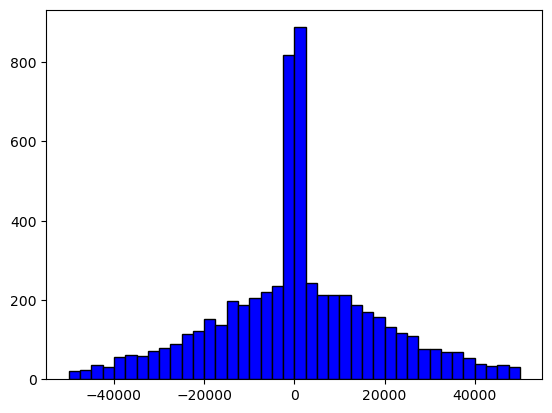

In [58]:
plt.hist(flats['price_increased_sum'], color = 'blue', edgecolor = 'black',
         bins = 40, range=(-50000, 50000))
plt.show()

Как можно увидеть, большая часть квартир после евроремонта не сильно изменила цену, что в целом ожидаемо. Более высокие отклонения в стоимости можно рассмотреть как ошибку обучения на выборке квартир с евроремонтом.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6453 entries, 0 to 6452
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   offer_views                     6453 non-null   int32  
 1   city                            6453 non-null   object 
 2   price_sq                        6453 non-null   int32  
 3   area                            6453 non-null   float64
 4   floor                           6453 non-null   int32  
 5   kitchen_area                    6453 non-null   float64
 6   bathroom_type                   6453 non-null   object 
 7   balconies                       6453 non-null   int32  
 8   is_apartment                    6453 non-null   bool   
 9   rooms                           6453 non-null   int32  
 10  has_gas                         6453 non-null   int32  
 11  house_floors                    6453 non-null   int32  
 12  house_wall_type                 64

None

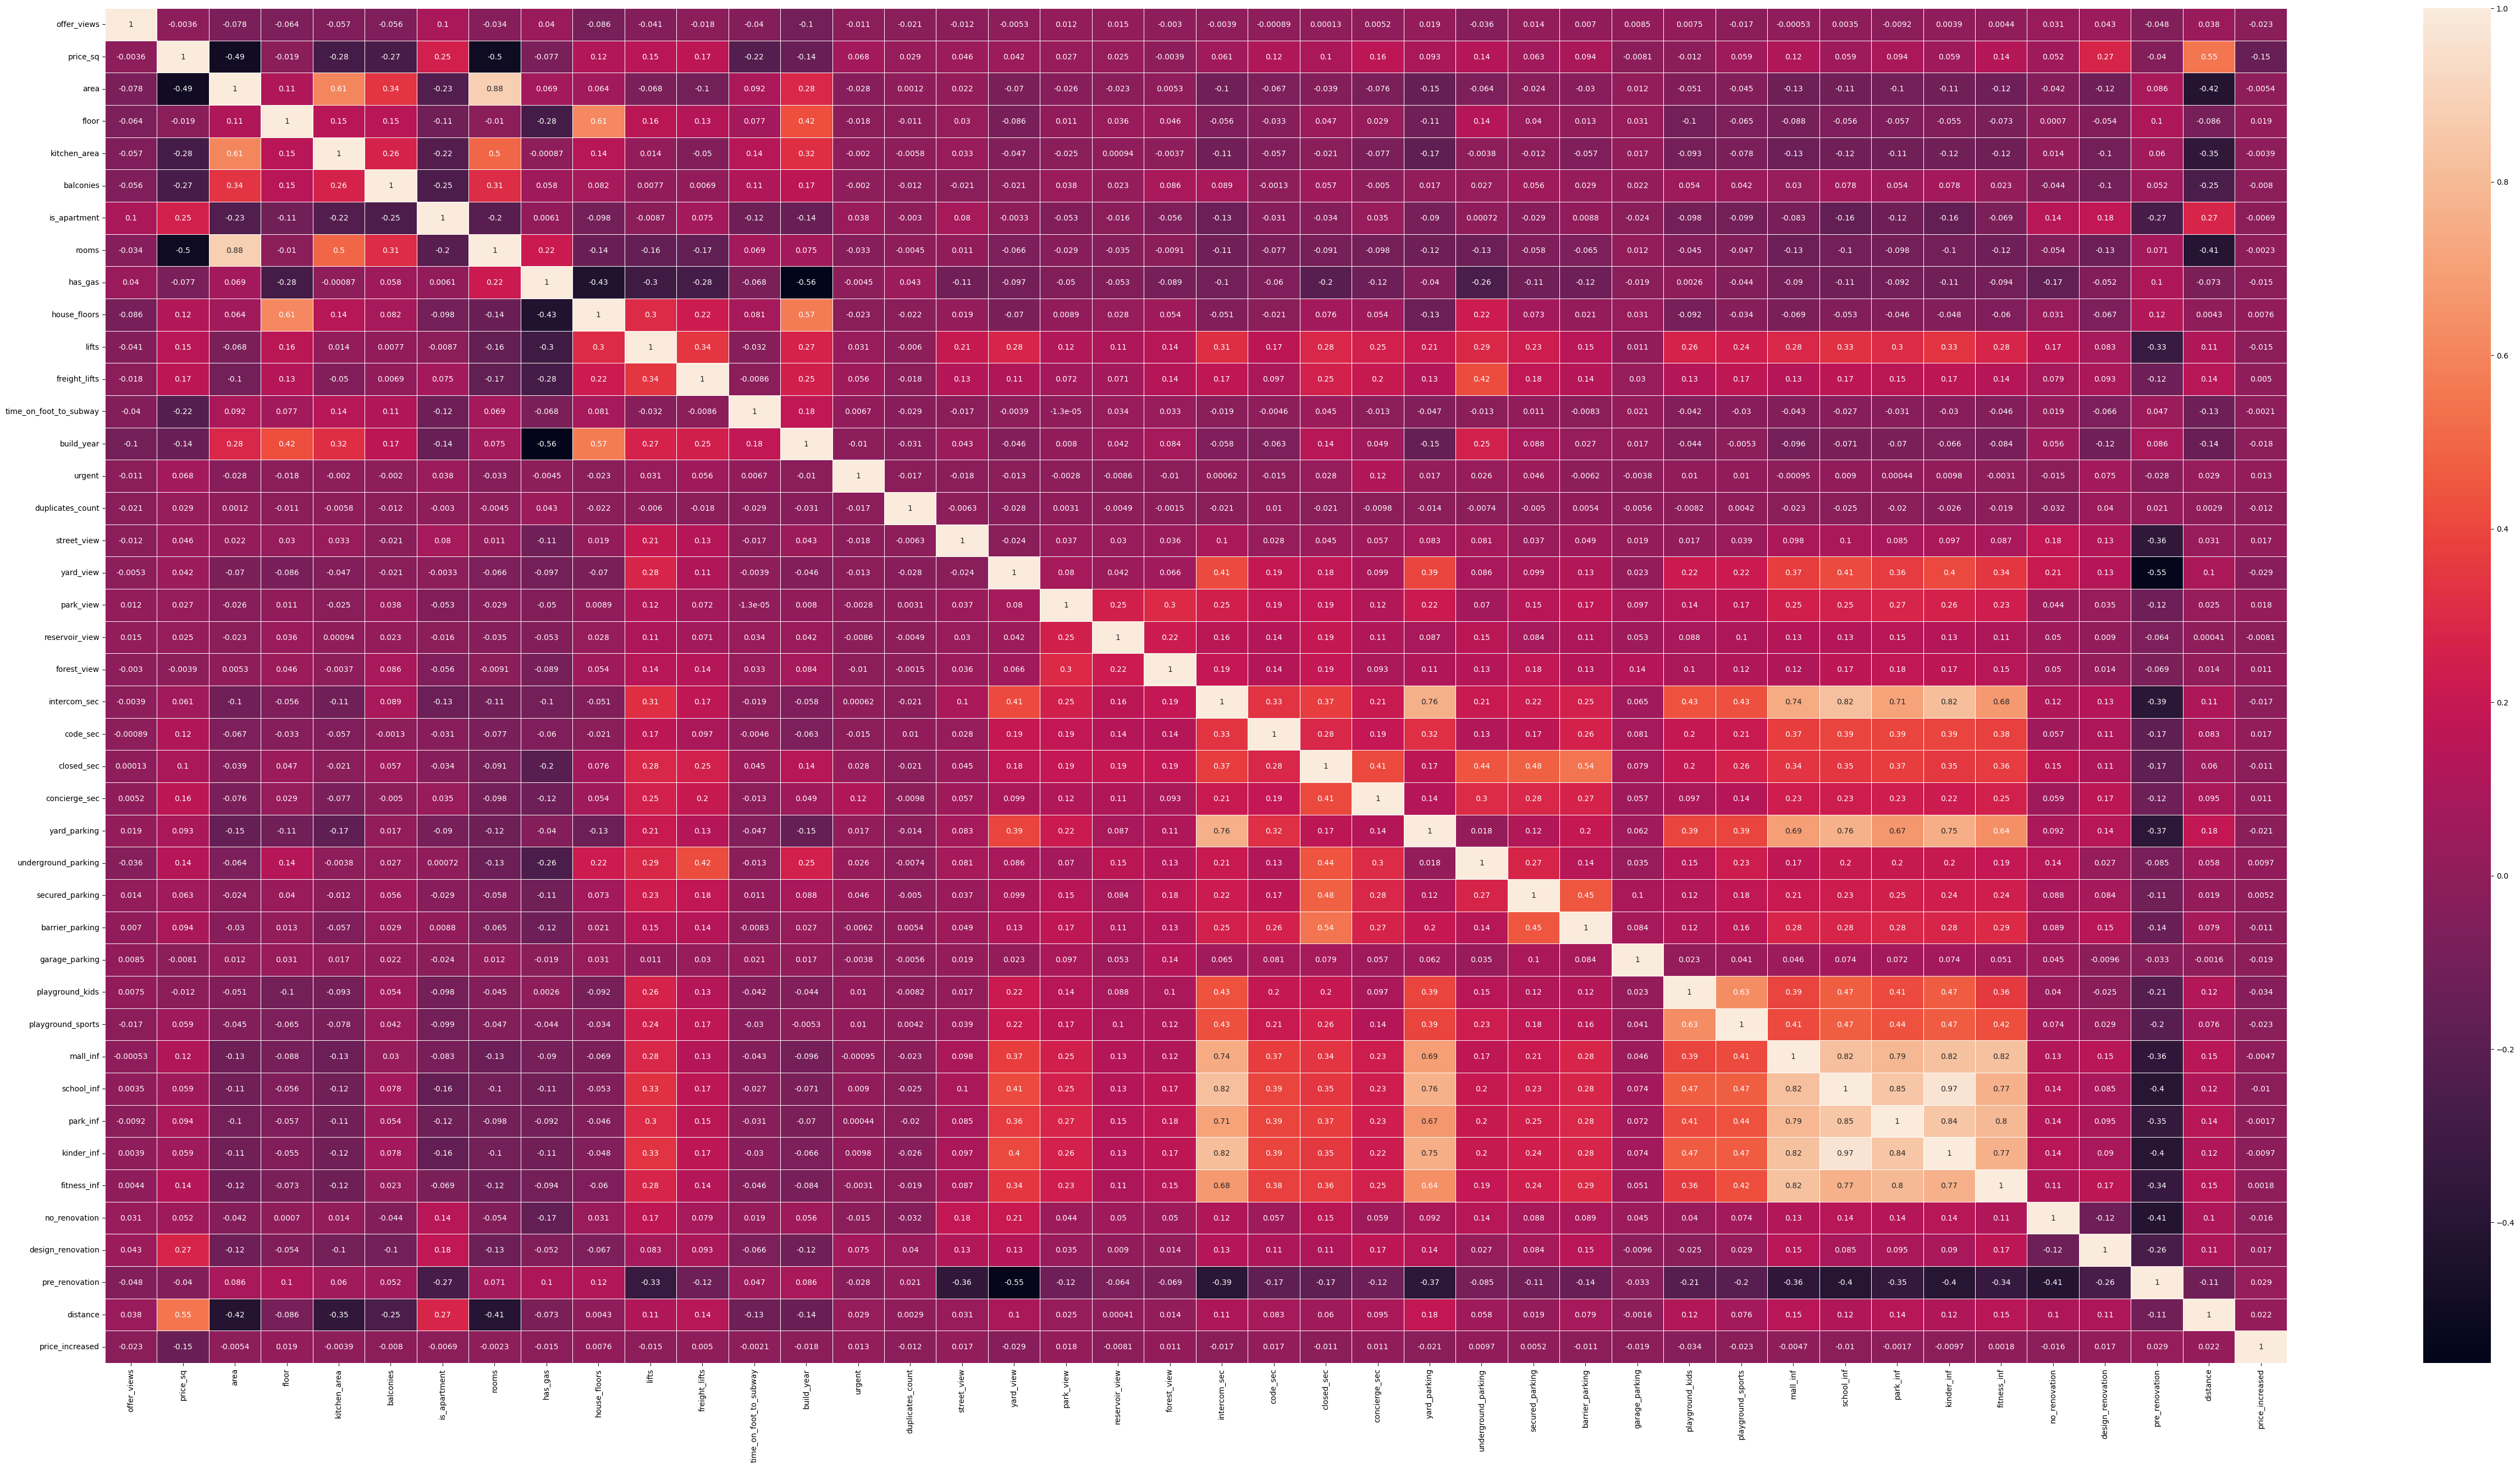

In [59]:
display(flats.info())

plt.figure(figsize=(32 * 2, 16 * 2))

sns.heatmap(flats.drop(['city', 'house_wall_type', 'sale_type', 'bathroom_type', 'all_data.is_auction', 'all_data.legal_options.approve', 'is_auction', 'price_increased_sum', 'new_price', 'euro_renovation'], axis=1).corr(), annot=True, linewidth=.5)

plt.show()

In [60]:
display(flats.sample(10))
display(flats['price_increased'].value_counts())

,offer_views,city,price_sq,area,floor,kitchen_area,bathroom_type,balconies,is_apartment,rooms,...,kinder_inf,fitness_inf,no_renovation,design_renovation,pre_renovation,euro_renovation,distance,new_price,price_increased_sum,price_increased
620,0,Казань,90161,31.0,1,6.00,Совмещенный,0,False,1,...,False,False,0,0,1,0,11,111817.150806,21656.150806,True
4299,76,Казань,146410,56.0,2,14.90,Совмещенный,1,False,1,...,False,False,0,0,1,0,5,146427.533662,17.533662,True
1366,0,Казань,130000,43.0,1,6.00,Совмещенный,0,False,2,...,False,False,0,0,0,0,4,142841.519993,12841.519993,True
3925,19,Казань,111024,64.4,3,8.00,Совмещенный,0,False,3,...,False,False,0,0,1,0,6,116241.895991,5217.895991,True
1251,323,Казань,133407,44.9,1,6.00,Совмещенный,0,False,2,...,False,False,0,0,1,0,2,130419.295357,-2987.704643,False
371,72,Казань,157142,42.0,5,10.98,Совмещенный,1,False,1,...,False,False,0,0,1,0,8,173089.269291,15947.269291,True
4216,0,Казань,100946,95.1,5,11.70,Раздельный,2,False,4,...,True,True,0,0,0,0,6,100948.816048,2.816048,True
6385,0,Санкт-Петербург,181034,29.0,15,2.00,Совмещенный,0,False,0,...,False,False,0,0,1,0,12,191093.219826,10059.219826,True
2869,193,Москва,346666,22.5,7,0.00,Совмещенный,1,False,0,...,False,False,0,0,1,0,16,299343.975283,-47322.024717,False
4123,57,Казань,117177,75.1,7,7.60,Совмещенный,1,False,4,...,False,False,0,0,1,0,6,117198.153025,21.153025,True


price_increased
True     3317
False    3136
Name: count, dtype: int64

#### Вывод по графику и матрице коррелляции по отношению к изменению стоимости:

Как можно заметить, большая часть квартир после ремонта не сильно изменилась в стоимости. Матрица коррелляции также не показывает зависимости от определённых столбцов. Попробую отбросить квартиры, у которых стоимость квадратного метра изменилась меньше чем на 50000.

In [61]:
flats.drop(flats[abs(flats['price_increased_sum']) < 50000].index, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 15 to 6446
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   offer_views                     414 non-null    int32  
 1   city                            414 non-null    object 
 2   price_sq                        414 non-null    int32  
 3   area                            414 non-null    float64
 4   floor                           414 non-null    int32  
 5   kitchen_area                    414 non-null    float64
 6   bathroom_type                   414 non-null    object 
 7   balconies                       414 non-null    int32  
 8   is_apartment                    414 non-null    bool   
 9   rooms                           414 non-null    int32  
 10  has_gas                         414 non-null    int32  
 11  house_floors                    414 non-null    int32  
 12  house_wall_type                 414 non

None

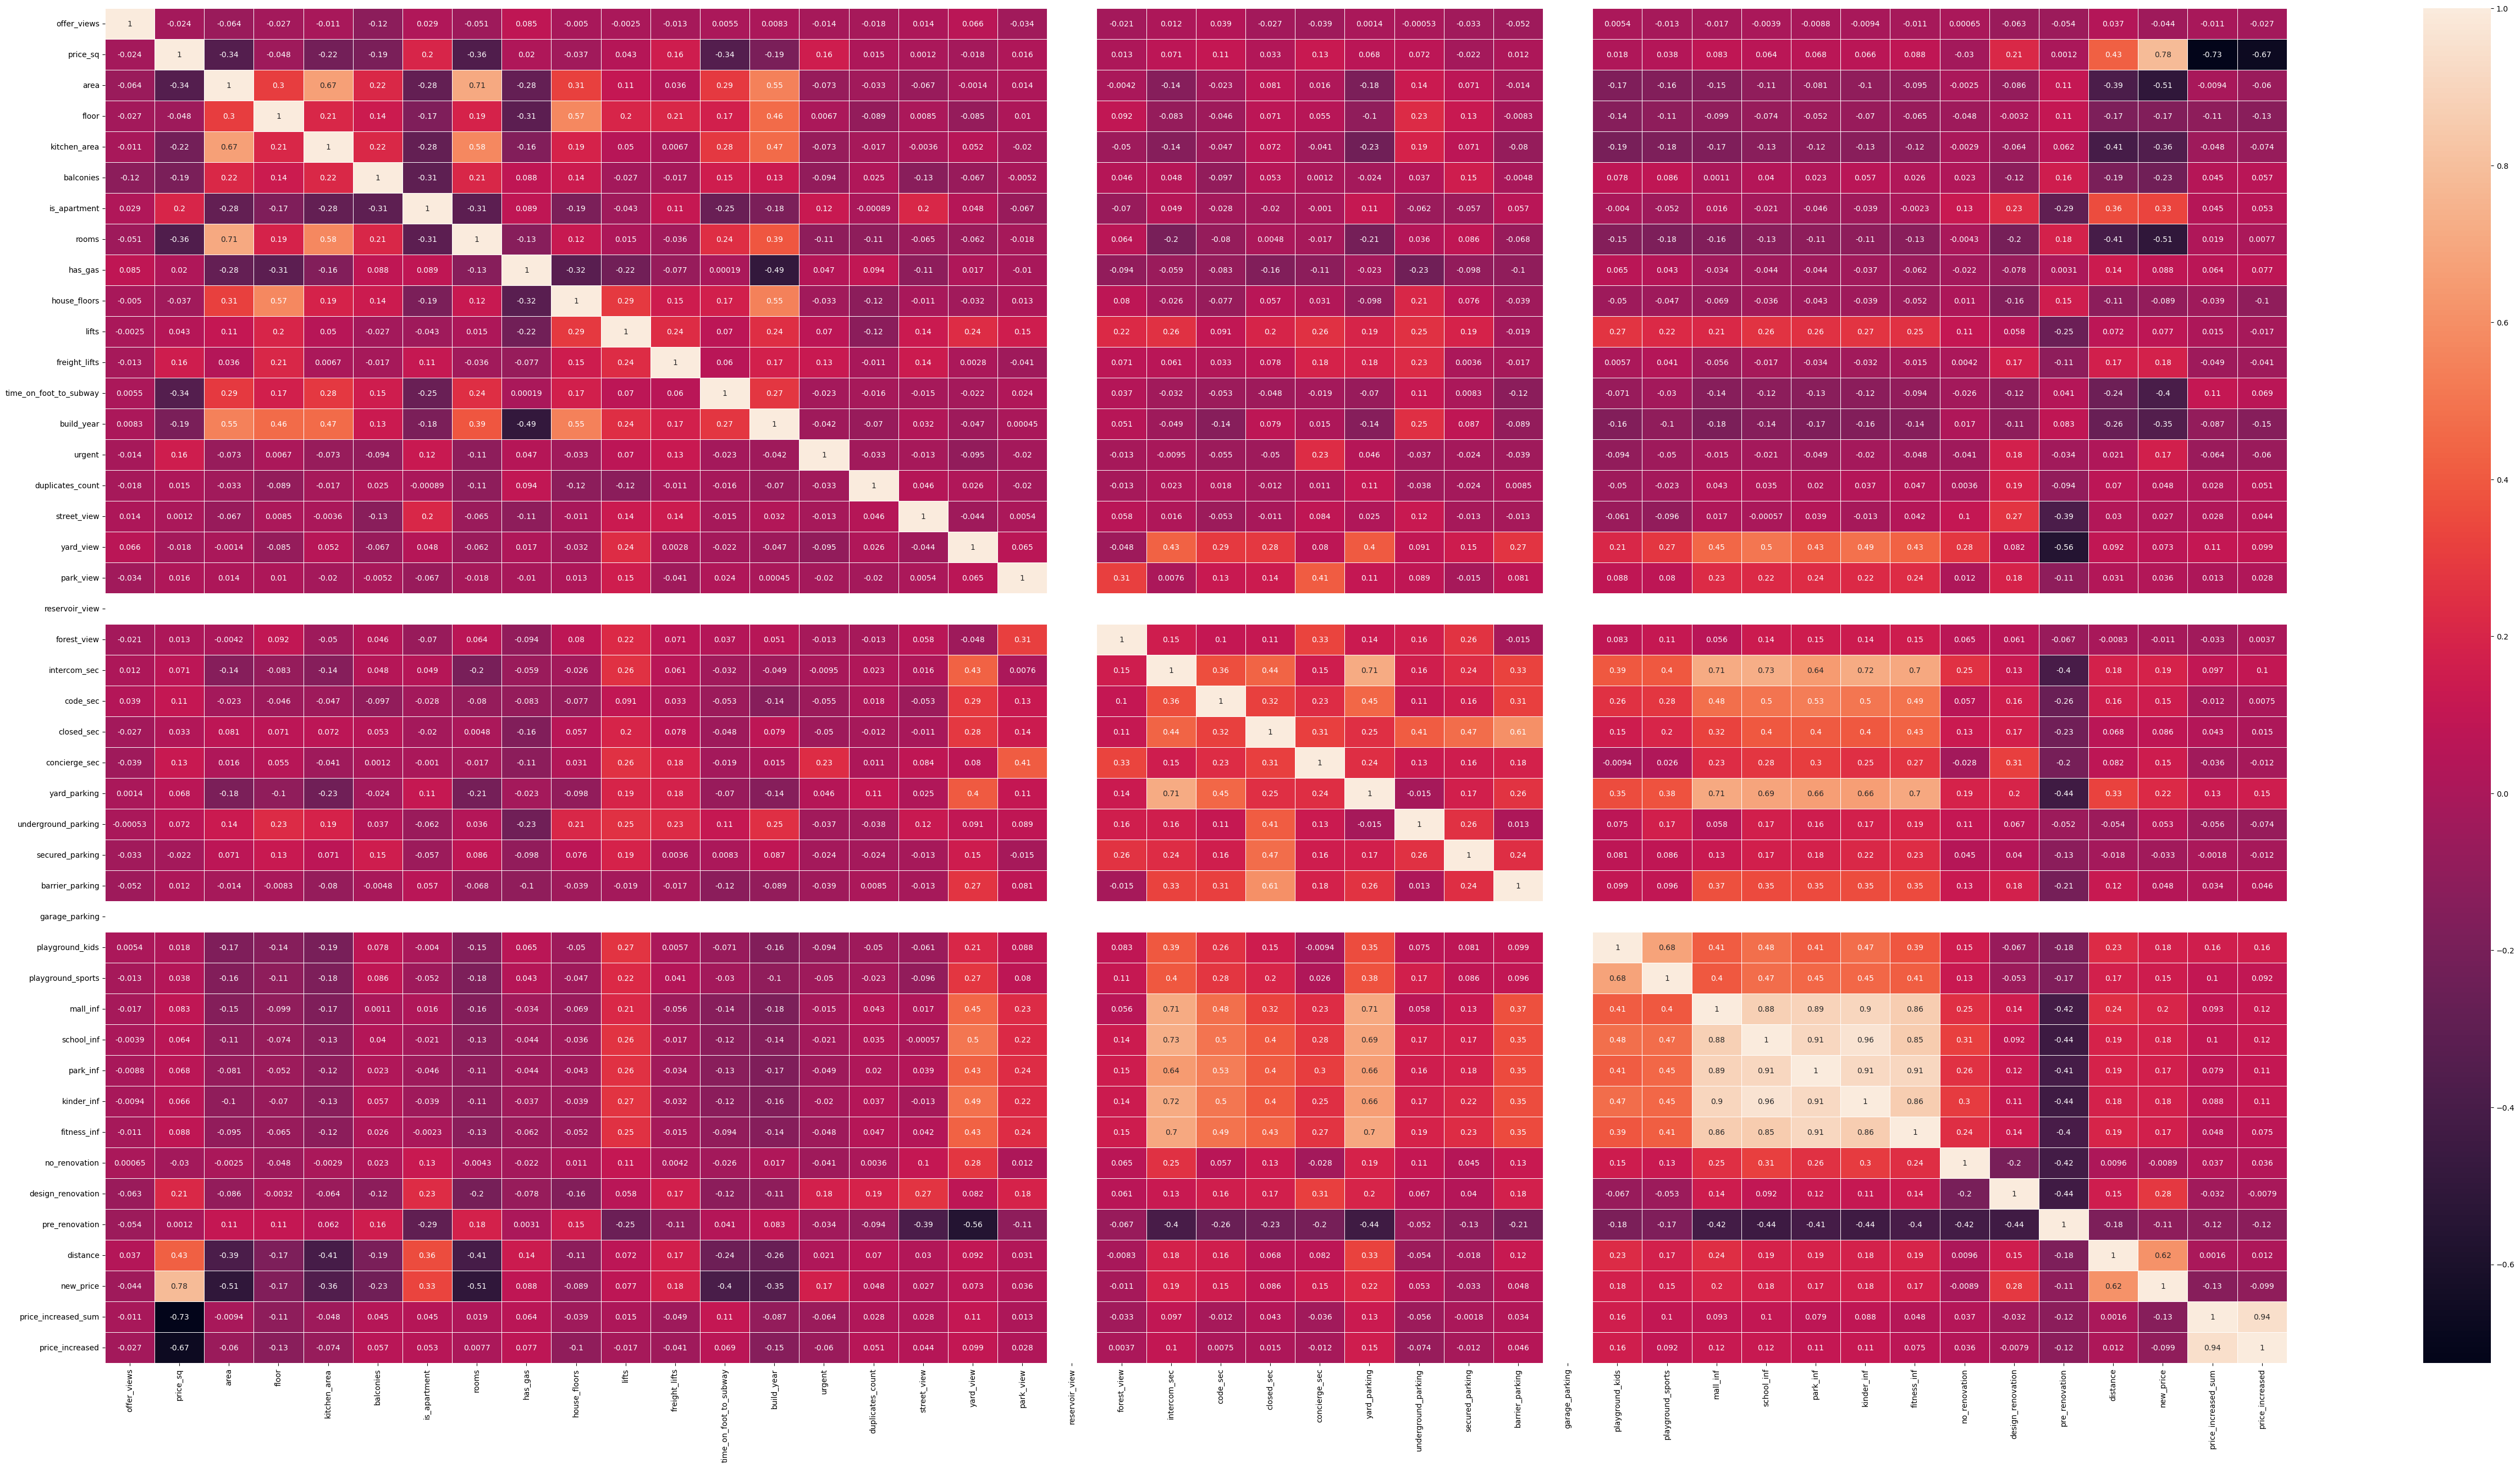

In [62]:
display(flats.info())

plt.figure(figsize=(32 * 2, 16 * 2))

sns.heatmap(flats.drop(['city', 'house_wall_type', 'sale_type', 'bathroom_type', 'all_data.is_auction', 'all_data.legal_options.approve', 'is_auction', 'euro_renovation'], axis=1).corr(), annot=True, linewidth=.5)

plt.show()

Матрица коррелляции не сильно изменила свои показания. Если у жилья есть парковка и инраструктура, то после ремонта цена вероятно подрастёт, однако предыдущий ремонт как оказывается не сильно влияет на стоимость за квадратный метр.

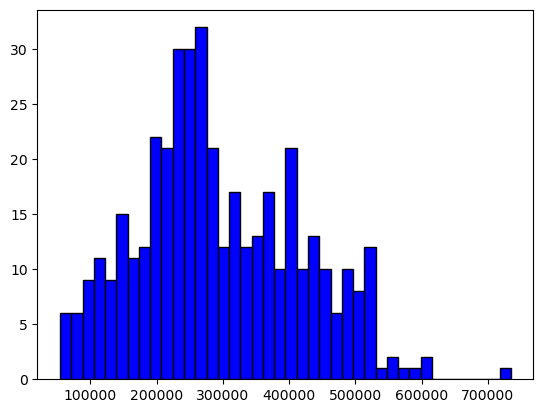

In [63]:
plt.hist(flats['price_sq'], color = 'blue', edgecolor = 'black',
         bins = 40)
plt.show()

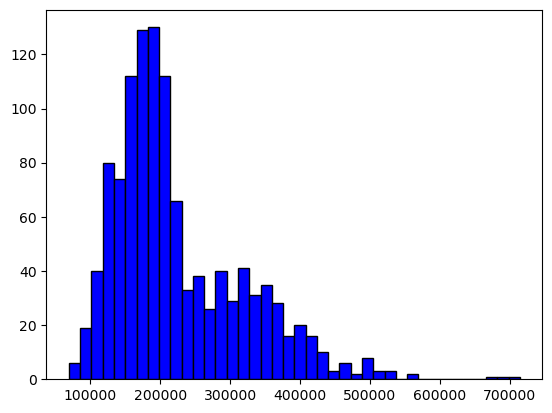

In [64]:
plt.hist(euro_flats['price_sq'], color = 'blue', edgecolor = 'black',
         bins = 40)
plt.show()

#### Причины снижения стоимости за квадратный метр:

Исходя из полученных данных - матрицы коррелляции - видно, что негативно на стоимость квартир после евро-ремонта влияет изначальная цена за квадратный метр. В свою очередь цена за квадратный метр сильно зависит от наличия дизайнерского ремонта и расстояния до центра. Очевидно после евроремонта расстояние никак не изменится, а вот ремонт из более дорогого - дизайнерского - превратится в евро, который оценивается дешевле. С другой стороны модель обучалась на датафрейме euro_flats - квартир с евроремонтом. На графиках, которые я отобразил выше, заметно, что средняя стоимость за квадратный метр квартир из euro_flats ниже чем из flats, поэтому модель нарочно занижала стоимость.

### 5 Вывод о проделанной работе

#### В ходе выполнения работы могу отметить следующие пункты:

1) Данные требовали тщательной предобработки. В определённых столбцах было много неявных дубликатов, например "Нет ремонта" = "no" в столбце renovation и т.п. Также хочется отметить, что данные, почему-то, были написаны по разному, хотя отражали одну суть, к примеру в определённых столбцах True в других true. Странными были столбцы, к примеру, с инфраструктурой, где столбцы представляли из себя скорее список, что затруднило этап предобработки. Много пропусков, часть получилось отбросить и восстановить, однако когда в данных много пропусков и установить причину их возникновения невозможно - это впоследствии негативно влияет на точность модели.

2) Проблем с обучением модели не возникло, значения непрерывные.

3) Проверив качество модели, я получил новый столбец стоимости квартир после евро ремонта. Я попытался отыскать взаимосвязь между снижением стоимости после ремонта и признаков из таблицы и нашёл 2 основных причины: обучение модели на выборке, в которой средняя стоимость за квадратный метр ниже, чем в выборке, на которой работает модель, соответственно цена искуственно занижается, а вторая причина - это изначальное наличие более дорогого ремонта, например дизайнерского.

4) Модель, рассчитывающая новую стоимость квартир готова.

In [65]:
flats.to_csv(r'new_flats.csv', index=False)